# Combining ice data

For this project we have multiple ice datasets. This notebook is used to combine them to a new dataset:

    Antarctic Ice Concentration (AIC)
    
The Land ice data comes from this source and is explained well at this [link](https://grace.jpl.nasa.gov/data/monthly-mass-grids/)

[data source](https://podaac.jpl.nasa.gov/dataset/TELLUS_GRAC-GRFO_MASCON_CRI_GRID_RL06_V2?ids=Collections:Availability&values=GRACE%20RL06:DELAY_MODE)

First let's start by loading our relevant module. 

In [1]:
from modules import combine_ice as ci
from modules import week5 as w5
# autoreload so I can easily modify the code without running this cell repetitively
%load_ext autoreload
%autoreload 2

Let's inspect the two datasets

In [9]:
SIC = ci.load_seaice()
SIC

<xarray.DataArray 'sic' (time: 494, y: 332, x: 316)>
[51826528 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1978-11-01 1978-12-01 ... 2019-12-01
  * y        (y) int32 4350000 4325000 4300000 ... -3875000 -3900000 -3925000
  * x        (x) int32 -3950000 -3925000 -3900000 ... 3875000 3900000 3925000

In [10]:
LIC = ci.load_landice()
LIC

<xarray.DataArray 'lwe_thickness' (time: 189, lat: 360, lon: 720)>
array([[[-4.00599188, -4.00599188, -4.00599188, ..., -4.00599188,
         -4.00599188, -4.00599188],
        [-4.00599188, -4.00599188, -4.00599188, ..., -4.00599188,
         -4.00599188, -4.00599188],
        [-4.00599188, -4.00599188, -4.00599188, ..., -4.00599188,
         -4.00599188, -4.00599188],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-4.80862574, -4.80862574, -4.80862574, ..., -4.80862574,
         -4.80862574, -4.80862574],
        [-4.80862574, -4.80862574, -4.80862574, ..., -4.80862574,
         -4.80862574, -4.80862574],
        [-4.80862574, -4.80862574, -4.80862574, ..., -4.80862574,
         -4.80862574, -4.80862574],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[14.25628772, 14.25628772, 14.25628772, ..., 14.25628772,
         14.25628772, 14.25628772],
        [14.25628772, 14.25628772, 14.25628772, ..., 14.25628772,
         14.25628772, 14.25628772],
        [14.25628772, 14.25628772, 14.25628772, ..., 14.25628772,
         14.25628772, 14.25628772],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * lon      (lon) float64 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 2002-04-17T12:00:00 ... 2020-09-16
Attributes:
    units:          cm
    long_name:      Liquid_Water_Equivalent_Thickness
    standard_name:  Liquid_Water_Equivalent_Thickness
    grid_mapping:   WGS84
    valid_min:      -1712.8382153531743
    valid_max:      787.751370958156
    comment:        Coastline Resolution Improvement (CRI) filter is applied

Our first problem here is that the units in each dataset are different. This is because they are measuring different things.

The sea ice data is measuring concentration of sea ice by measuring the albedo of different ocean regions. Where the albedo is high we associate this with more ice. 
Whereas the land ice data is measuring the mass of liquid water equivilent (LWE). The unit used is m as the researchers using this associate the thickness of LWE with its mass.

To overcome this, we will normalise each dataset at each gridpoint so our units become standard deviations of change.

In [11]:
LIC = ci.latlon_to_polarstereo(LIC)

C:\Users\hjel867\AppData\Local\Continuum\anaconda3\envs\Antarctica_2\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\hjel867\AppData\Local\Continuum\anaconda3\envs\Antarctica_2\lib\site-packages\pyproj\crs\crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
C:\Users\hjel867\AppData\Local\Continuum\anaconda3\envs\Antarctica_2\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=

In [12]:
import xarray as xr
# IC = SIC.fillna(LIC)

Ice = xr.Dataset(dict(SIC=SIC, LIC=LIC
                        ))

In [13]:
Ice = (Ice.sel(time=slice('2002-01-01','2019-12-31'))
      .pipe(w5.find_anomalies)
      .pipe(w5.yearly_average)
      .pipe(w5.normalise_indepenant)
     )

C:\Users\hjel867\AppData\Local\Continuum\anaconda3\envs\Antarctica_2\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [14]:
import matplotlib.pyplot as plt

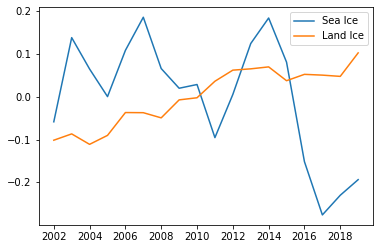

In [15]:
fig, ax = plt.subplots()
# ax.plot(Ice.IC.time,Ice.IC.mean(dim=('x','y')), label='Total Ice', lw=3)
ax.plot(Ice.SIC.time,Ice.SIC.mean(dim=('x','y')), label='Sea Ice')
ax.plot(Ice.LIC.time,Ice.LIC.mean(dim=('x','y')), label='Land Ice')
ax.legend()
plt.show()